In [1]:
# Path of the file to read
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# 그래프 한글 설정
plt.rc("font", family = "Malgun Gothic")
sb.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, style='white')

In [3]:
# 사용될 영웅, 티어 리스트 
Tier = ["All", "Bronze", "Silver", "Gold", "Platinum", "Diamond", "Master", "Grandmaster"]
Tan_heroes = ['Reinhardt', 'D.Va', 'Roadhog', 'Zarya', 'Orisa', 'Sigma',
              'Doomfist', 'Winston', 'Wrecking Ball', 'Ramattra', 'Junker Queen']
Tan_heroes_mean = ['Reinhardt', 'D.Va', 'Roadhog', 'Zarya', 'Orisa', 'Sigma',
              'Doomfist', 'Winston', 'Wrecking Ball', 'Ramattra', 'Junker Queen', 'mean']

In [4]:
# 게임 출시 이후 ~ 랭크 전 데이터
ow2_data_0_path = "../data_project/data/ow2_quickplay_heroes_stats.csv"
ow2_data_0 = pd.read_csv(ow2_data_0_path, index_col= "Role")
ow2_data_0

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,...,Annihilation Kills / 10min,"Jagged Blade Accuracy, %",Carnage Kills / 10min,"Wound Uptime, %",Rampage Kills / 10min,"Focusing Beam Accuracy, %",Focusing Beam Kills / 10min,"Sticky Bomb Accuracy, %",Sticky Bomb Kills / 10min,Duplicate Kills / 10min
Role,,,,,,,,,,,,,,,,,,,,,
Support,Ana,All,4.91,7.75,48.73,9.80,3.93,53,2641,7278.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Support,Ana,Bronze,4.29,6.05,47.17,9.12,3.75,53,2483,6819.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Support,Ana,Silver,4.33,5.77,47.27,9.19,3.80,53,2505,6829.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Support,Ana,Gold,4.45,6.01,47.54,9.37,3.86,54,2542,6958.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Support,Ana,Platinum,4.70,7.06,47.94,9.60,3.91,53,2575,7168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Damage,Echo,Gold,2.86,0.81,50.03,18.56,6.75,58,7922,NaN,...,NaN,NaN,NaN,NaN,NaN,37.41,7.02,26.0,8.46,3.35
Damage,Echo,Platinum,2.95,0.88,50.41,19.12,6.76,57,8200,NaN,...,NaN,NaN,NaN,NaN,NaN,38.21,7.31,26.0,8.71,3.52
Damage,Echo,Diamond,3.07,0.95,50.50,19.48,6.72,55,8400,NaN,...,NaN,NaN,NaN,NaN,NaN,39.06,7.44,26.0,8.84,3.66


In [9]:
#역할군이 탱커 분류되어 있는 애들만 추출해오기
ow2_data_0_tan = ow2_data_0.loc[ow2_data_0.index == "Tank"]
ow2_data_0_tan

#일반적인 지표 값만 가져오기 ~11, 컬럼12 이후로는 캐릭터 별 스킬에 대한 수치가 나타나있음. ex) 궁극기 사용 횟수
ow2_ss0_tan = ow2_data_0_tan[ow2_data_0_tan.columns[:5]]
ow2_ss0_tan

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %"
Role,,,,,
Tank,Reinhardt,All,3.28,3.86,51.80
Tank,Reinhardt,Bronze,2.98,3.70,51.30
Tank,Reinhardt,Silver,3.03,3.63,51.43
Tank,Reinhardt,Gold,3.13,3.72,51.32
Tank,Reinhardt,Platinum,3.19,4.04,51.76
...,...,...,...,...,...
Tank,Junker Queen,Gold,5.19,0.60,51.93
Tank,Junker Queen,Platinum,5.31,0.69,52.03
Tank,Junker Queen,Diamond,5.40,0.70,51.89


In [10]:
# 반복되는 코드 :: 승률과 픽률에 대한 평균치 구하기.
#픽률 평균
no_sort_mean = ow2_ss0_tan["Pick Rate, %"].groupby(ow2_ss0_tan["Skill Tier"]).mean()
sort_mean_PickRate = no_sort_mean.reindex(Tier)

#승률 평균
no_sort_mean = ow2_ss0_tan["Win Rate, %"].groupby(ow2_ss0_tan["Skill Tier"]).mean()
sort_mean_WinRate = no_sort_mean.reindex(Tier)

# "Skill Tier"이 "Bronze", "Silver", "Gold", "Platinum"인 행들만 필터링
low_tiers = ["Bronze", "Silver", "Gold", "Platinum"]

# "Skill Tier"이 "Bronze", "Silver", "Gold", "Platinum"인 행들만 필터링
high_tiers = ["Diamond", "Master", "Grandmaster"]

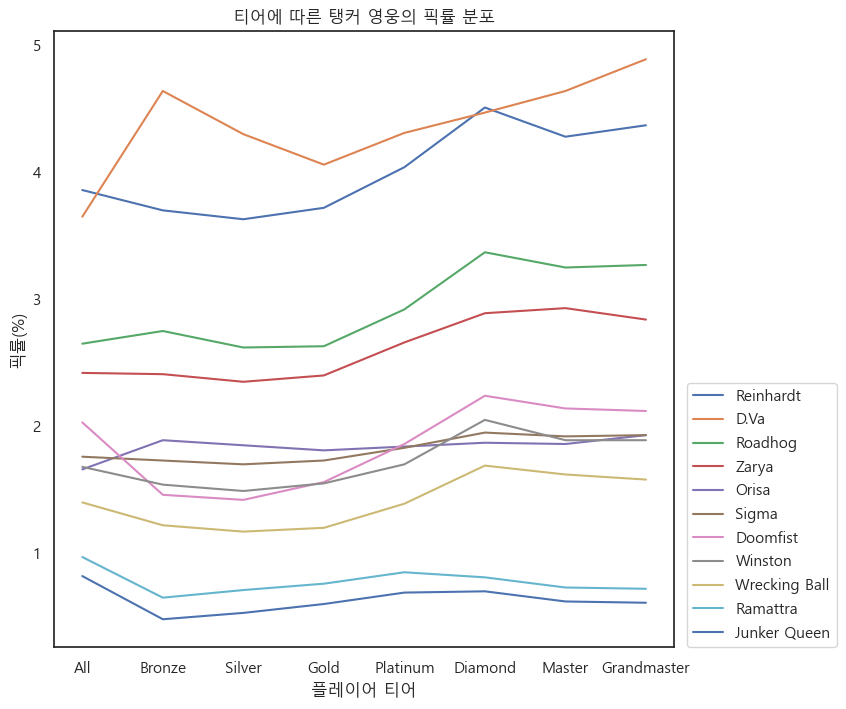

In [13]:
# 픽률 그래프 그리기
# 반복문으로 코드 압축
plt.figure(figsize=(8,8))
for hero in Tan_heroes:
    ow2_dag_fisrt_hero = ow2_ss0_tan[ow2_ss0_tan["Hero"] == hero]
    plt.plot(ow2_dag_fisrt_hero["Skill Tier"],
             ow2_dag_fisrt_hero["Pick Rate, %"],
             label=hero)

plt.xlabel("플레이어 티어")
plt.ylabel("픽률(%)")
plt.title("티어에 따른 탱커 영웅의 픽률 분포")
plt.legend(Tan_heroes, loc=[1.02,0])

plt.show()

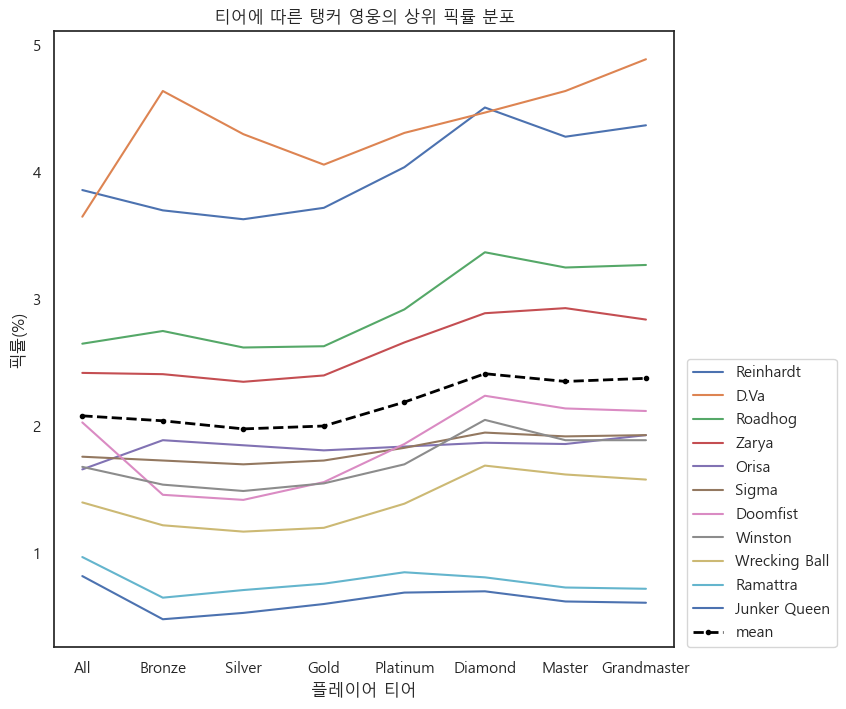

In [14]:
# 상위 픽률 그래프 그리기 (평균치 있음)
# 반복문으로 코드 압축
plt.figure(figsize=(8,8))
for hero in Tan_heroes:
    ow2_sup_fisrt_hero = ow2_ss0_tan[ow2_ss0_tan["Hero"] == hero]
    plt.plot(ow2_sup_fisrt_hero["Skill Tier"], ow2_sup_fisrt_hero["Pick Rate, %"], label=hero)

#평균치 그리기
plt.plot(sort_mean_PickRate, linestyle='dashed', linewidth=2, color='black', marker='o', markersize=3 )

plt.legend(Tan_heroes_mean, loc=[1.02,0])

plt.xlabel("플레이어 티어")
plt.ylabel("픽률(%)")
plt.title("티어에 따른 탱커 영웅의 상위 픽률 분포")
plt.show()

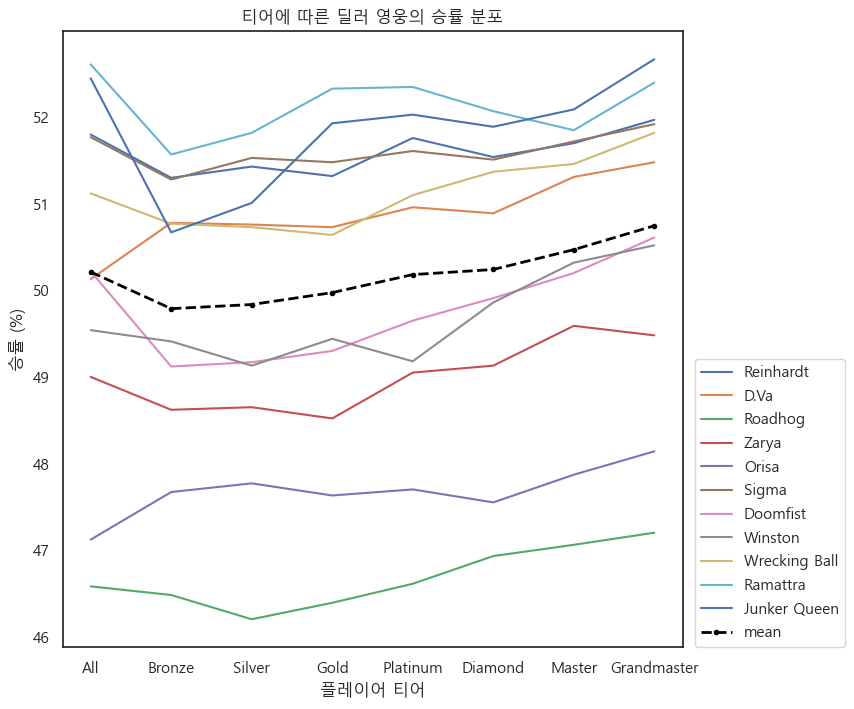

In [15]:
#승률 그래프 그리기
# 반복문으로 코드 압축
plt.figure(figsize=(8,8))
for hero in Tan_heroes:
    ow2_sup_fisrt_hero = ow2_ss0_tan[ow2_ss0_tan["Hero"] == hero]
    plt.plot(ow2_sup_fisrt_hero["Skill Tier"], ow2_sup_fisrt_hero["Win Rate, %"], label=hero)

#승률 평균치 그리기
plt.plot(sort_mean_WinRate, linestyle='dashed', linewidth=2, color='black', marker='o', markersize=3)


plt.xlabel("플레이어 티어")
plt.ylabel("승률 (%)")
plt.title("티어에 따른 딜러 영웅의 승률 분포")
plt.legend(Tan_heroes_mean, loc=[1.02,0])
plt.show()

In [ ]:
# 상위티어상위티어상위티어상위티어 티어임 ~~~ 아 모르겠다~~~ 정규화 데이터 + 승률값을 기준으로 영웅들의 평가 수치를 그리기.
# "Skill Tier"이 "Diamond", "Master", "Grandmaster"인 행들만 필터링
filtered_data = ow2_ss0_tan[ow2_ss0_tan['Skill Tier'].isin(high_tiers)]

# 상위 티어 "KDA Ratio"의 평균 계산
KDA_ = filtered_data.groupby('Hero')['KDA Ratio'].mean()
PICK_ = ow2_ss0_tan["Pick Rate, %"].groupby(ow2_ss0_tan["Hero"]).mean()
WIN_ = ow2_ss0_tan["Win Rate, %"].groupby(ow2_ss0_tan["Hero"]).mean()

MS_SCORE_list = []
# 정규화 승률 / (승률+픽률+KDA 비중)  print(KDA_.loc['Ashe'])
for hero in Tan_heroes :
    MS_AVG = [hero, round(KDA_.loc[hero] / (KDA_.loc[hero] + PICK_.loc[hero] + WIN_.loc[hero]) * 100, 3)]
    MS_SCORE_list.append(MS_AVG)

# 꿀 수치 기반 딜러 데이터프레임
MS_honey_high = pd.DataFrame(columns=['Hero', 'MS_SCORE'])
MS_honey_high = pd.concat([pd.Series(item, index=['Hero', 'MS_SCORE']) for item in MS_SCORE_list], axis=1).T
MS_honey_high_mean = MS_honey["MS_SCORE"].mean()

# 그래프 그리기
plt.figure(figsize=(8, 8))  
sb.barplot(y = 'Hero', x= 'MS_SCORE', data= MS_honey_high)
plt.axvline(x = MS_honey_high_mean, color='r', linestyle='--', label='x=5')
plt.xlabel("MS_SOCRE(꿀영웅력)")
plt.ylabel("영웅")
plt.title("정규화 기반 상위티어 승률 꿀영웅 수치")
